# **House Price Prediction Using Machine Learning**

# Import Libraries



In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Dataset Upload/Collection

In [60]:
# upload dataset
df = pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Exploratory Data Analysis

## Understanding the Dataset

**Check Shape of Dataset**

In [61]:
df.shape

(545, 13)

**Dataset columns**

In [62]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

**Info of Dataset**

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**Data Type of Dataset**

In [64]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


**descriptive Statistic**

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


# Data Cleaning

## Handling Missing Values

**Check Missing Values in Dataset**

In [66]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [67]:
df.isnull().sum().sum()

0

## Remove Duplicates

**Check Duplicates in Dataset**

In [68]:
df.duplicated().sum()

0

## Data Analysis

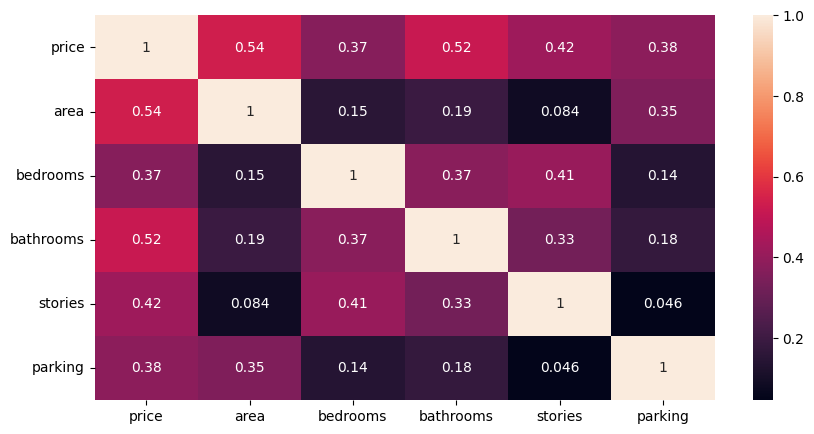

In [69]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.show()

**Distribution Plot of input features**

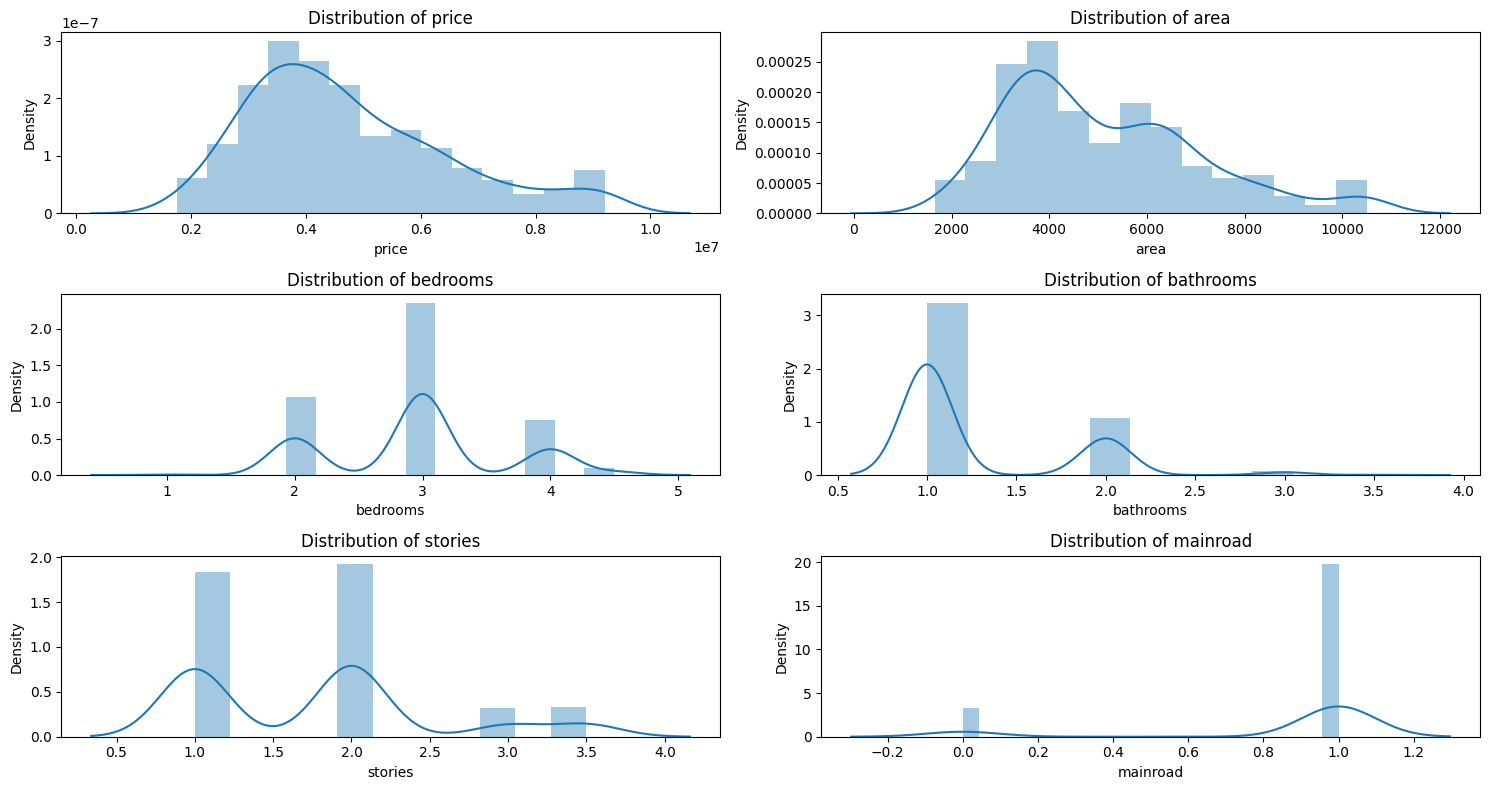

In [99]:
# Distribution Plots for Input Features
plt.figure(figsize=(15, 8))
for i, feature in enumerate(df.columns):
  if i < 6:
    plt.subplot(3, 2, i + 1)
    if df[feature].dtype == 'int64' or df[feature].dtype == 'float64':
      sns.distplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

**Scatterplot of input features with target features**

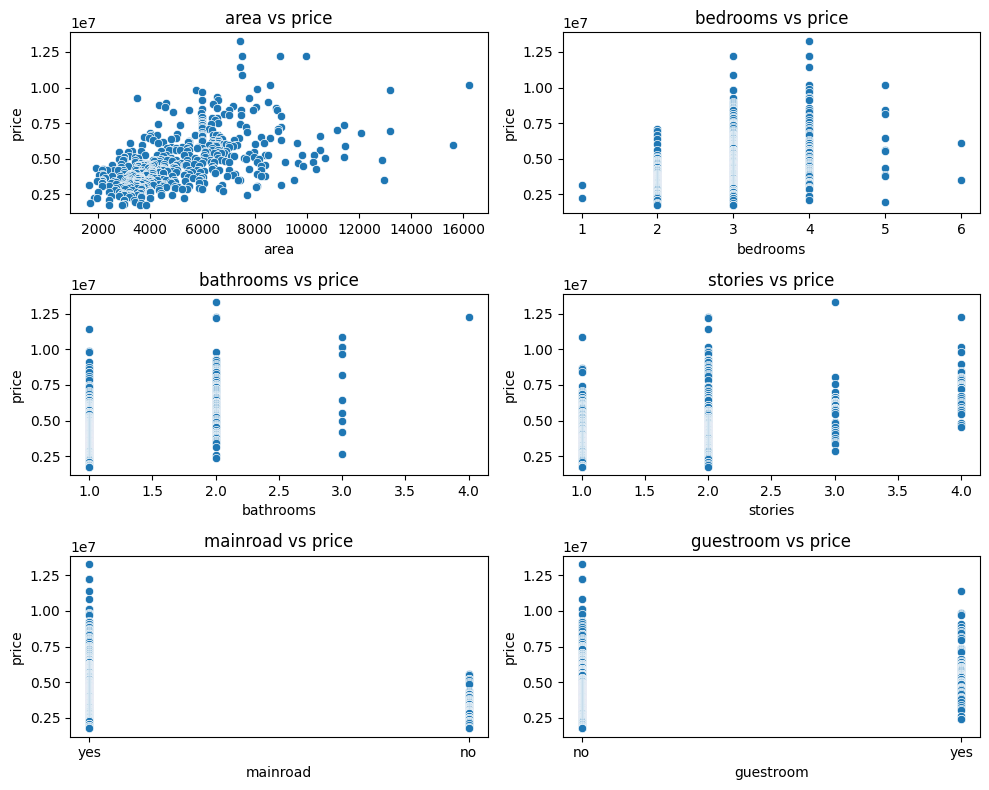

In [71]:
# Scatterplots for Each Input Feature vs Output (Price)
target_feature = 'price'
input_features = df.columns.drop(target_feature)
plt.figure(figsize=(10, 8))
for i, feature in enumerate(input_features):
  if i < 6:
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(x=df[feature], y=df[target_feature])
    plt.title(f'{feature} vs {target_feature}')
plt.tight_layout()
plt.show()

## Dedect the Outlier using Boxplot

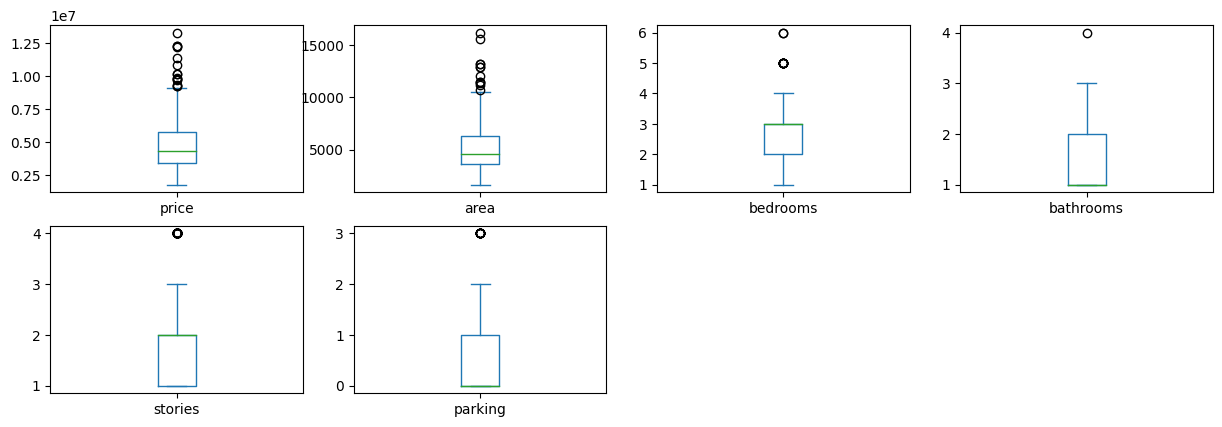

In [72]:
df.plot(kind='box', subplots=True, layout=(4,4),figsize=(15,10))
plt.show()

## Remove Outlier

In [73]:
def remove_outlier(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3 -q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    return lb,ub

columns = ['price','area','bedrooms','bathrooms','stories','parking']

for i in columns:
    lb,ub = remove_outlier(df[i])
    df[i] = np.where(df[i]<lb,lb,df[i])
    df[i] = np.where(df[i]>ub,ub,df[i])

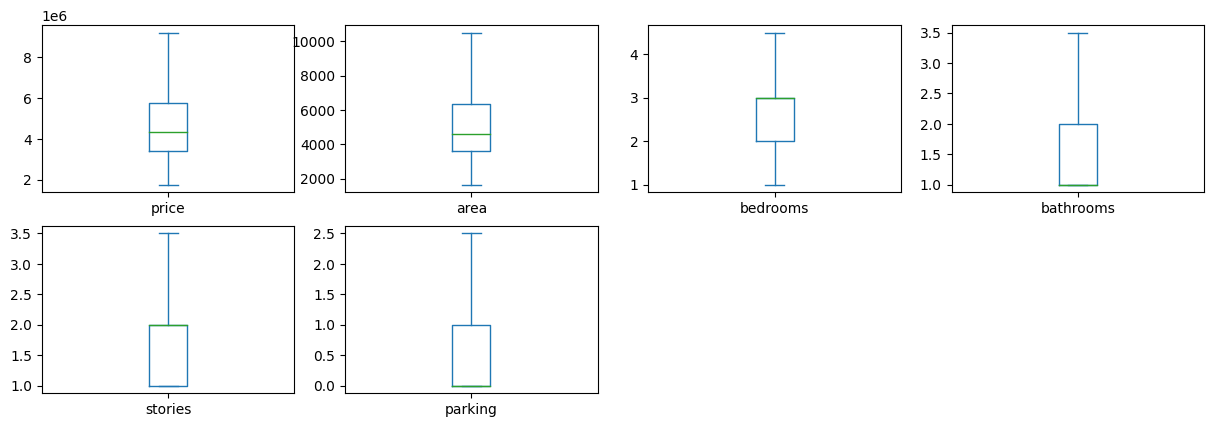

In [74]:
df.plot(kind='box', subplots=True, layout=(4,4),figsize=(15,10))
plt.show()

## Feature Encodding

**Encoding Categorical Variables**

In [75]:
df.select_dtypes(include=['object','category']).columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

**Encoding with Label and Ordinal using sklearn**

In [76]:
from sklearn.preprocessing import LabelEncoder
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
le = LabelEncoder()
for i in columns:
    df[i] = le.fit_transform(df[i])

In [77]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000.0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,0
1,9205000.0,8960.0,4.0,3.5,3.5,1,0,0,0,1,2.5,0,0
2,9205000.0,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,1
3,9205000.0,7500.0,4.0,2.0,2.0,1,0,1,0,1,2.5,1,0
4,9205000.0,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,0


## Splitting the Dataset

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature Scaling

**Standardization:Standard Scaler**

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.445856,0.081641,1.561266,2.276137,0.407155,-0.466773,-0.746420,-0.230521,1.501243,0.391688,-0.552620,-1.409401
1,1.040313,0.081641,1.561266,-0.969107,0.407155,-0.466773,1.339728,-0.230521,1.501243,2.202032,-0.552620,-0.079317
2,-0.636055,-1.342184,-0.562640,-0.969107,0.407155,-0.466773,1.339728,-0.230521,1.501243,1.598584,-0.552620,-1.409401
3,-1.233484,0.081641,-0.562640,0.328990,0.407155,-0.466773,1.339728,-0.230521,-0.666115,-0.815209,1.809561,1.250768
4,-0.668750,0.081641,-0.562640,0.328990,0.407155,-0.466773,-0.746420,-0.230521,-0.666115,-0.815209,-0.552620,1.250768


## Model Train LinearRegression

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [84]:
# Check score
lr.score(X_train_scaled, y_train)*100

68.85741570748038

In [85]:
y_pred = lr.predict(X_test_scaled)

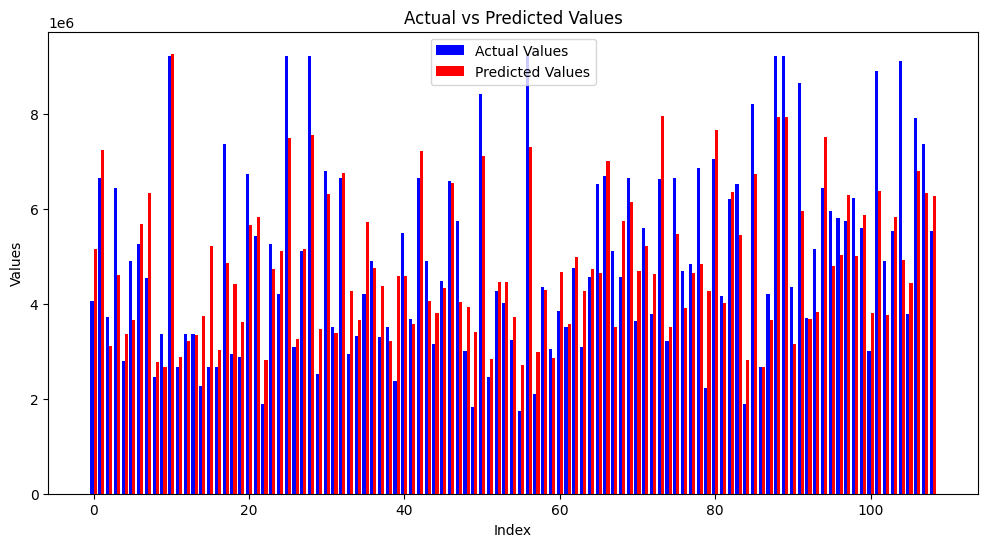

In [86]:
indices = np.arange(len(y_test))
plt.figure(figsize=(12, 6))

# Bar plot for actual values
plt.bar(indices - 0.2, y_test, width=0.4, label='Actual Values', color='blue')

# Bar plot for predicted values
plt.bar(indices + 0.2, y_pred, width=0.4, label='Predicted Values', color='red')

# Add title and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()


## Evaluating the Model

In [87]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [88]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mse)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 1306349555394.0933
Mean Absolute Error: 892277.2562874871
Root Mean Squared Error: 1142956.4975947656
R-squared: 0.6766374954615078


## Apply Regularization Techniques

In [89]:
# Lasso
from sklearn.linear_model import Lasso
la = Lasso(alpha=100)
la.fit(X_train_scaled,y_train)

la.score(X_train_scaled, y_train)*100

68.85741367670562

In [90]:
from sklearn.linear_model import Ridge
ri = Ridge(alpha=10)
ri.fit(X_train_scaled,y_train)

ri.score(X_train_scaled, y_train)*100

68.84545635840902

## Hyperparameter Tuning using GridSearchCV

In [91]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import xgboost

In [92]:
# Models and Hyperparameter Grids
param_grids = {
      'Decision Tree Regression' : {
          'model' : DecisionTreeRegressor(),
          'params':{
              'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'max_depth':[10,20,30],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,2,4]
          }},
      'Random Forest Regression' : {
          'model' : RandomForestRegressor(),
          'params':{
              'n_estimators':[10,50,100],
              'criterion':['squared_error', 'absolute_error'],
              'max_depth':[10,20,],
              'max_features':['auto', 'sqrt', 'log2'],
              }},
      'Support Vector Regression' : {
          'model' : SVR(),
          'params':{
              'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'C':[0.1, 1, 10],
              'gamma':['scale', 'auto'],
          }},
      'K-Nearest Neighbors Regression' : {
          'model' : KNeighborsRegressor(),
          'params':{
              'n_neighbors':[3,5,7,9],
              'weights':['uniform', 'distance'],
              'p':[1,2],
          }},
      'XGBoost Regression' : {
          'model' : xgboost.XGBRegressor(),
          'params':{
              'n_estimators':[100, 200, 300],
              'learning_rate':[0.01, 0.1, 0.2],
              'max_depth':[3, 5, 7]
              }}


}

In [93]:
results = []

for model_name, mp in param_grids.items():
    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    grid_search.fit(X_train_scaled, y_train)

    y_pred = grid_search.predict(X_test_scaled)

    #  metric for regression problems
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"Best params for {model_name}: {grid_search.best_params_}")
    print(f"R-squared for {model_name}: {r2:.2f}")
    print(f"Mean Squared Error for {model_name}: {mse:.2f}")
    print(f"Mean Absolute Error for {model_name}: {mae:.2f}")
    print(f"Root Mean Squared Error for {model_name}: {rmse:.2f}")
    print()

    results.append({
        'model': model_name,
        'best_score': grid_search.best_score_,
        'test_score': r2,
        'best_params': grid_search.best_params_,
        'score' : grid_search.score(X_train_scaled, y_train)
    })

results_df = pd.DataFrame(results)

results_df

Best params for Decision Tree Regression: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
R-squared for Decision Tree Regression: 0.51
Mean Squared Error for Decision Tree Regression: 1963628500642.43
Mean Absolute Error for Decision Tree Regression: 1056691.12
Root Mean Squared Error for Decision Tree Regression: 1401295.29

Best params for Random Forest Regression: {'criterion': 'absolute_error', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}
R-squared for Random Forest Regression: 0.65
Mean Squared Error for Random Forest Regression: 1417017360000.39
Mean Absolute Error for Random Forest Regression: 925506.78
Root Mean Squared Error for Random Forest Regression: 1190385.38

Best params for Support Vector Regression: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
R-squared for Support Vector Regression: -0.09
Mean Squared Error for Support Vector Regression: 4409343244412.84
Mean Absolute Error for Support Vector Regressi

,model,best_score,test_score,best_params,score
0,Decision Tree Regression,0.519394,0.513940,"{'criterion': 'squared_error', 'max_depth': 10...",0.812022
1,Random Forest Regression,0.670289,0.649244,"{'criterion': 'absolute_error', 'max_depth': 1...",0.903113
2,Support Vector Regression,-0.058555,-0.091451,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",-0.047637
3,K-Nearest Neighbors Regression,0.648466,0.623102,"{'n_neighbors': 9, 'p': 2, 'weights': 'distance'}",0.998380
4,XGBoost Regression,0.641088,0.628330,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.875593


## Model Train K-Nearest Neighbors Regression

In [94]:
from sklearn.neighbors import KNeighborsRegressor

In [95]:
knn = KNeighborsRegressor(n_neighbors=9, p=2, weights='distance')
knn.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=9, weights='distance')

In [96]:
test_accuracy = knn.score(X_train_scaled, y_train)*100
test_accuracy

99.83803729527742

Accuracy score = 99%

In [97]:
y_pred1 = knn.predict(X_test_scaled)

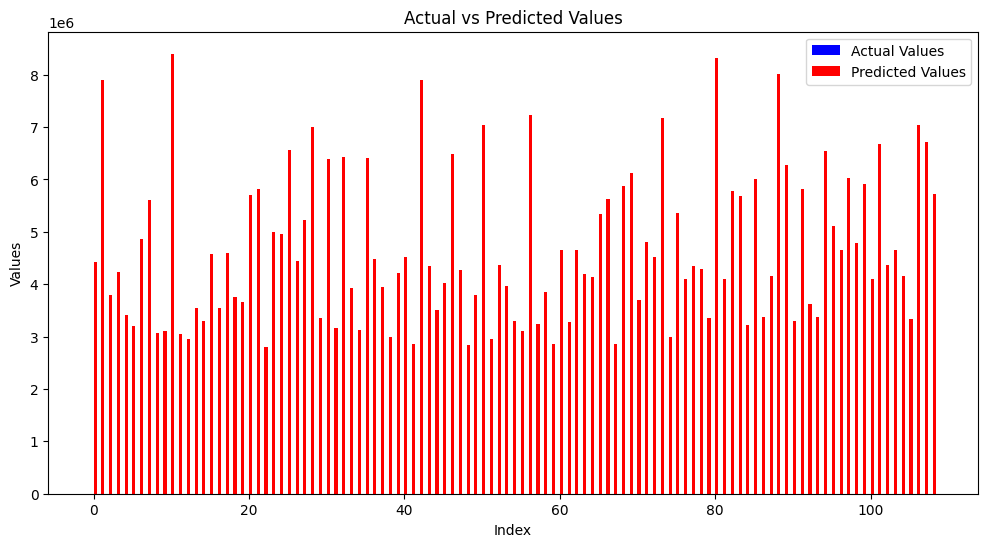

In [98]:

indices = np.arange(len(y_test))


plt.figure(figsize=(12, 6))

# Bar plot for actual values
plt.bar(indices - 0.2, test_accuracy, width=0.4, label='Actual Values', color='blue')

# Bar plot for predicted values
plt.bar(indices + 0.2, y_pred1, width=0.4, label='Predicted Values', color='red')

plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()
